# Part II - Loan Data from Prosper
## by Keren Wang'ombe

## Investigation Overview

## Dataset Overview

> The dataset contains information about loans from Prosper. Prosper is a peer-to-peer lending platform. Borrowers can find competitive rates for personal loans. Loans are funded by investors, not Prosper itself. The dataset contains 81 parameters that needed cleaning before visualisation.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
#Creating a new dataset from the data provided of the columns that will be used in the analysis. 
loan = pd.read_csv('prosperLoanData.csv', usecols=['ListingNumber', 'ListingKey','Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR','ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 
            'EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanMonthsSinceOrigination','LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment'])

## (Visualization 1)
### Does ProsperRating(Alpha) and ProsperScore affect APR?

> From the plot, the observation is that the higher the `Prosper Rating (Alpha)` the lower the `BorrowerAPR`. This therefore means that inorder to have a good rating a person's APR must be below 0.1%. The boxplot therefore shows an inverse relationship between the variables which can be translated into meaning that the APR is a significant factor when considering having good ratings and score.

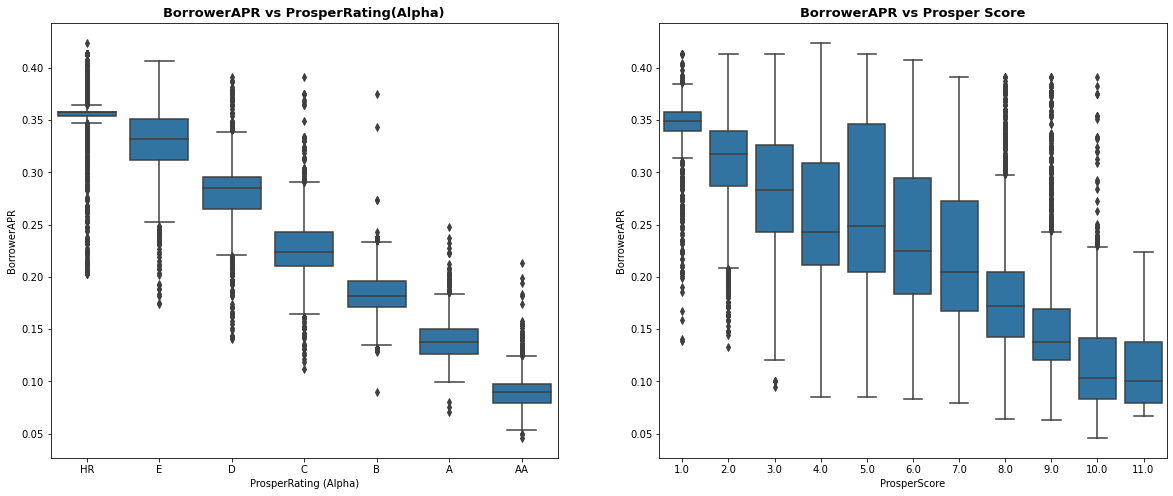

In [8]:
# ploting fig size
plt.figure(figsize=[20,8])
# stating the position of the plot
plt.subplot(1,2,1)
plt.title('BorrowerAPR vs ProsperRating(Alpha)', fontsize=13,weight=("bold"))
# setting a box plot to show the distribution 
sb.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=colour);
# stating the position of the second plot
plt.subplot(1,2,2)
plt.title('BorrowerAPR vs Prosper Score', fontsize=13,weight=("bold"))
#setting a box plot for the Scores distribution
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', color=colour);

## Visualization 2
### How is the LoanAmount affected by BorrowersAPR

> The relationship between the two is negative, this means as one varible increase the other decreases.In this case when the the Loan amount increases, the BorrowerAPR decreases. 

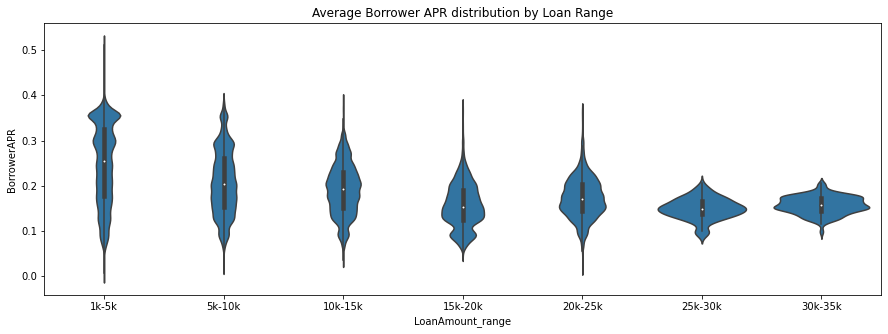

In [11]:
# used the .cut function to create a new column for loan amount range
loan['LoanAmount_range']=pd.cut(loan.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 5])
# plotting the violinplot
sb.violinplot(data=loan, x='LoanAmount_range', y='BorrowerAPR', color=colour);
plt.title('Average Borrower APR distribution by Loan Range');

## Visualization 3
### What effect does the loan term have on loan amount and borrower APR?

> The plot shows a trend that the longer the term (5 years) the higher the borrower APR's which means the longer the term the individual collect the loan the higher their APR gets.

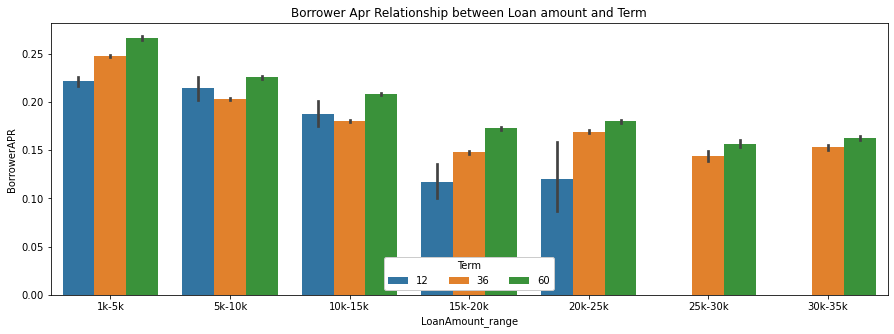

In [12]:
# bar plot for the distribution
plt.figure(figsize = [15, 5])
yx=sb.barplot(data=loan,x='LoanAmount_range',y='BorrowerAPR',hue='Term');
yx.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term");

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt